## Aplicando autoencoder no Mnist dataset

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.layers import Input, LeakyReLU
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

## Carregando a base de dados

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

###  Normalização dos dados

In [6]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Construção do modelo Autoencoder

In [9]:
input_img= Input(shape=(784,)) ##Total de variáveis (pixels)

# Etapa Codificador (Encoder)
encoded = Dense(units=32, activation='relu')(input_img)   #camada com 32 neurônios ocultos + funçaõ de ativação relu 

# Etapa Decodificador (Decoder)
decoded = Dense(units=784, activation='sigmoid')(encoded) #camada com 784 neurônios ocultos + funçaõ de ativação sigmoid 

In [10]:
#Etapa de encoder (Comprimir dados)
encoder = Model(input_img, encoded)
encoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Etapa de autoencoder (Reconstrução da imagem)
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #compilando o modelo

In [13]:
autoencoder.fit(X_train, X_train,
                epochs=80,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/80
235/235 [==============================] - 3s 9ms/step - loss: 0.2741 - val_loss: 0.1876
Epoch 2/80
235/235 [==============================] - 2s 8ms/step - loss: 0.1692 - val_loss: 0.1525
Epoch 3/80
235/235 [==============================] - 2s 8ms/step - loss: 0.1439 - val_loss: 0.1341
Epoch 4/80
235/235 [==============================] - 2s 8ms/step - loss: 0.1292 - val_loss: 0.1224
Epoch 5/80
235/235 [==============================] - 2s 9ms/step - loss: 0.1195 - val_loss: 0.1145
Epoch 6/80
235/235 [==============================] - 2s 8ms/step - loss: 0.1128 - val_loss: 0.1088
Epoch 7/80
235/235 [==============================] - 2s 9ms/step - loss: 0.1076 - val_loss: 0.1043
Epoch 8/80
235/235 [==============================] - 2s 8ms/step - loss: 0.1036 - val_loss: 0.1008
Epoch 9/80
235/235 [==============================] - 2s 8ms/step - loss: 0.1006 - val_loss: 0.0981
Epoch 10/80
235/235 [==============================] - 2s 9ms/step - loss: 0.0984 - val_loss: 0.0963

In [14]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [15]:
encoded_imgs.shape

(10000, 32)

In [16]:
predicted.shape

(10000, 784)

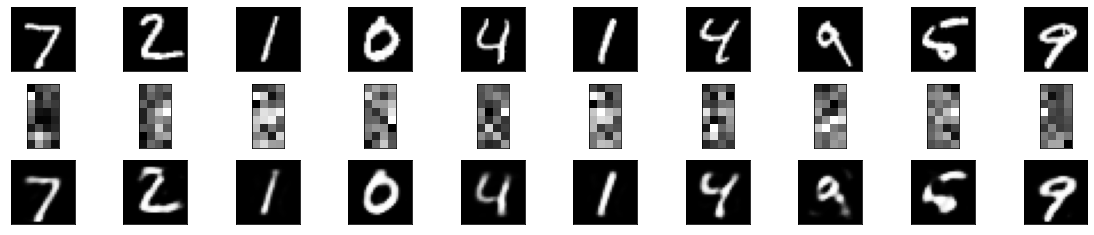

In [17]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()

### Aplicando o autoenconder em conjunto com a rede convolucional

Como nossas entradas são imagens, faz sentido usar redes neurais convolucionais (convnets) como codificadores e decodificadores. Em configurações práticas, os autoencoders aplicados a imagens são sempre autoencoders convolucionais -- eles simplesmente têm um desempenho muito melhor.

Vamos implementar um. O codificador consistirá em uma pilha de camadas Conv2D e MaxPooling2D (agrupamento máximo sendo usado para amostragem espacial descendente), enquanto o decodificador consistirá em uma pilha de camadas Conv2D e UpSampling2D.

UpSampling2D é apenas um simples aumento de escala da imagem usando o vizinho mais próximo ou aumento bilinear.

In [18]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) #1 camada
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x) #2 camadas
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x) # 3 camadas
encoded = layers.MaxPooling2D((2, 2), padding='same')(x) #encoded 

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) #decoded

autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Carregando o dataset mnist novamente e aplicando a normalização dos dados:

In [19]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [20]:
#demora um pouco o processamento, +- 40 Minutos...

from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 48s 100ms/step - loss: 0.2282 - val_loss: 0.1539
Epoch 2/50
469/469 [==============================] - 49s 104ms/step - loss: 0.1424 - val_loss: 0.1328
Epoch 3/50
469/469 [==============================] - 55s 116ms/step - loss: 0.1275 - val_loss: 0.1213
Epoch 4/50
469/469 [==============================] - 51s 108ms/step - loss: 0.1193 - val_loss: 0.1153
Epoch 5/50
469/469 [==============================] - 50s 106ms/step - loss: 0.1146 - val_loss: 0.1115
Epoch 6/50
469/469 [==============================] - 48s 102ms/step - loss: 0.1114 - val_loss: 0.1091
Epoch 7/50
469/469 [==============================] - 47s 99ms/step - loss: 0.1090 - val_loss: 0.1067
Epoch 8/50
469/469 [==============================] - 46s 98ms/step - loss: 0.1072 - val_loss: 0.1056
Epoch 9/50
469/469 [==============================] - 46s 98ms/step - loss: 0.1056 - val_loss: 0.1038
Epoch 10/50
469/469 [==============================] - 46s 98ms/step - loss:

313/313 [==============================] - 3s 10ms/step


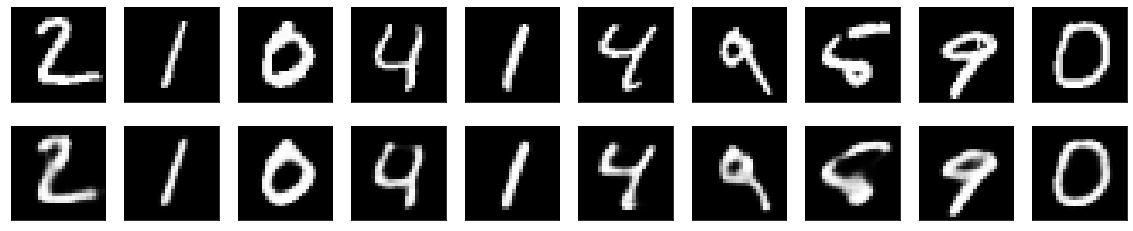

In [22]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()